In [6]:
import sys
sys.path.append('..')
from core import project_root
projroot = project_root()
import warnings
warnings.filterwarnings("ignore")

In [7]:
from models import ToyModel
from models import WhistleNet

torch_model = ToyModel("cnn", 10)
torch_model = WhistleNet("boh2", 10)
torch_model.load("whistle/boh")

MODEL LOADED!


DATA SAVED!
torch.Size([1, 1, 28, 28])


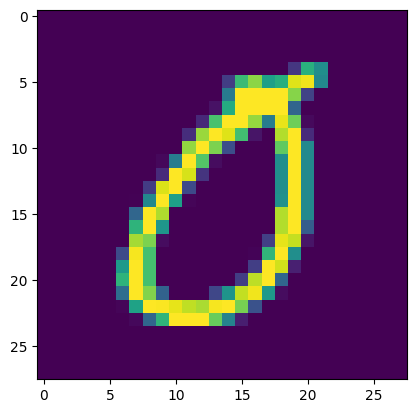

In [8]:
import matplotlib.pyplot as plt
from torch import Tensor
import torch

from datamodules.mnist import MnistDataset
from models import MNIST_CONFIG as config

dataset = MnistDataset(tobeloaded=False, params=config)
dataloader = dataset.train_dataloader(1)
batch: Tensor = next(iter(dataloader))[0]
img = batch[0]
plt.gca().imshow(img)
torch_input = batch.unsqueeze(1).to(torch.float32)
print(torch_input.shape)

In [9]:
# from core.trainer import Trainer
# from models import TRAIN_CONFIG

# trainer = Trainer(params=TRAIN_CONFIG)
# # trainer.fit(torch_model,dataset)
# print(torch_model(torch_input)[0])
# plt.plot(torch_model.test_scores, label=f'mnist - test scores')
# plt.show()

In [10]:
from core import ExecutorchModel
from core import ONNXModel

torch_model.eval()
executorchmodel = ExecutorchModel(torch_model)
onnxmodel = ONNXModel(torch_model)
# onnxmodel.load()

INFO:executorch.backends.xnnpack.partition.xnnpack_partitioner:Found 8 subgraphs to be partitioned.


opcode         name                           target                              args                                               kwargs
-------------  -----------------------------  ----------------------------------  -------------------------------------------------  -----------------
placeholder    arg12_1                        arg12_1                             ()                                                 {}
call_function  alloc                          <function alloc at 0x7a7335823ba0>  (((1, 1, 513), torch.float32),)                    {}
call_function  aten_alias_copy_default        aten.alias_copy.out                 (arg12_1,)                                         {'out': alloc}
call_function  alloc_1                        <function alloc at 0x7a7335823ba0>  (((1, 1, 513), torch.float32),)                    {}
call_function  aten_alias_copy_default_1      aten.alias_copy.out                 (aten_alias_copy_default,)                         {'out': alloc_1}
cal

In [16]:
import time
import numpy as np

onnx_elapsed = 0
iterations = 10000
onnx_elapsed = []

for i in range(iterations):
    torch_input = torch.rand(torch_model.example_input[0].shape)
    start = time.time()
    onnxmodel(torch_input)
    end = time.time()
    onnx_elapsed.append(end - start)

print(np.mean(onnx_elapsed) * 1000)

0.3491533041000366
